In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.mnist.load_data()

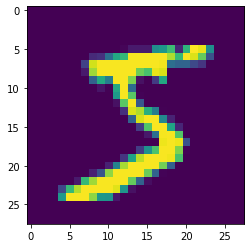

In [3]:
plt.imshow(train_images[0])

In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# Normalise and reshape
train_images=train_images.reshape(train_images.shape[0],28,28,1)

In [6]:
train_images=(train_images-127.5)/127.5

In [7]:
BUFFER_SIZE=train_images.shape[0]
BATCH_SIZE=100
train_dataset=tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [8]:
def Discriminator():
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(7,(3,3),padding="same",input_shape=(28,28,1)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dense(50,activation="relu"))
    model.add(tf.keras.layers.Dense(1))

    return model

In [9]:
model_discriminator=Discriminator()
model_discriminator(np.random.rand(1,28,28,1).astype("float32"))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.22400779]], dtype=float32)>

In [10]:
discriminator_optimizer=tf.optimizers.Adam(1e-3)

In [11]:
def D_loss(real_predictions,fake_predictions):
    real_predictions=tf.sigmoid(real_predictions)
    fake_predictions=tf.sigmoid(fake_predictions)
    real_loss=tf.losses.binary_crossentropy(tf.ones_like(real_predictions),real_predictions)
    fake_loss=tf.losses.binary_crossentropy(tf.zeros_like(fake_predictions),fake_predictions)
    return fake_loss+real_loss

In [12]:
def Generator():
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(7*7*256,input_shape=(100,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Reshape((7,7,256)))
    model.add(tf.keras.layers.Conv2DTranspose(128,(3,3),padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2DTranspose(64,(3,3),strides=(2,2),padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2DTranspose(1,(3,3),strides=(2,2),padding="same"))
    return model

In [13]:
model_generator=Generator()

In [14]:
generator_optimizer=tf.optimizers.Adam(1e-4)

In [15]:
def G_loss(fake_predictions):
    fake_predictions=tf.sigmoid(fake_predictions)
    fake_loss=tf.losses.binary_crossentropy(tf.ones_like(fake_predictions),fake_predictions)
    return fake_loss

In [16]:
# Training
def train(dataset,epochs):
    for _ in range(epochs):
        for images in dataset:
            images=tf.cast(images,tf.dtypes.float32)
            train_step(images)

In [17]:
def train_step(images):
    fake_image_noise=np.random.randn(BATCH_SIZE,100).astype("float32")
    with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
        generated_images=model_generator(fake_image_noise)
        real_output=model_discriminator(images)
        fake_output=model_discriminator(generated_images)
        
        gen_loss=G_loss(fake_output)
        disc_loss=D_loss(real_output,fake_output)
        
        gradients_of_generator=gen_tape.gradient(gen_loss,model_generator.trainable_variables)
        gradients_of_discriminator=disc_tape.gradient(disc_loss,model_discriminator.trainable_variables)
        
        generator_optimizer.apply_gradients(zip(gradients_of_generator,model_generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator,model_discriminator.trainable_variables))
        print("generator loss", np.mean(gen_loss))
        print("discriminator loss",np.mean(disc_loss))

In [18]:
train(train_dataset,2)

generator loss 0.6970888
discriminator loss 1.6233922
generator loss 0.70155466
discriminator loss 0.718959
generator loss 0.7134405
discriminator loss 0.6762131
generator loss 0.73892313
discriminator loss 0.6500214
generator loss 0.7754702
discriminator loss 0.61756074
generator loss 0.8227422
discriminator loss 0.57911736
generator loss 0.8776485
discriminator loss 0.5381942
generator loss 0.95120275
discriminator loss 0.4894818
generator loss 1.0216479
discriminator loss 0.4475893
generator loss 1.1248356
discriminator loss 0.39449367
generator loss 1.2225376
discriminator loss 0.35106698
generator loss 1.3403093
discriminator loss 0.30591878
generator loss 1.4528607
discriminator loss 0.2695067
generator loss 1.6103078
discriminator loss 0.22584307
generator loss 1.7503957
discriminator loss 0.19405106
generator loss 1.9621059
discriminator loss 0.15421994
generator loss 2.1385012
discriminator loss 0.128873
generator loss 2.2770278
discriminator loss 0.11140579
generator loss 2.5

generator loss 9.267768
discriminator loss 0.014602691
generator loss 9.781095
discriminator loss 0.008606971
generator loss 9.995371
discriminator loss 0.015311063
generator loss 9.468457
discriminator loss 0.0074145705
generator loss 8.810306
discriminator loss 0.004633357
generator loss 7.429768
discriminator loss 0.029600944
generator loss 6.436316
discriminator loss 0.044554472
generator loss 6.9220805
discriminator loss 0.014515629
generator loss 7.229904
discriminator loss 0.020501656
generator loss 8.432976
discriminator loss 0.008410995
generator loss 8.606367
discriminator loss 0.07240724
generator loss 8.931673
discriminator loss 0.05411218
generator loss 9.110335
discriminator loss 0.033640403
generator loss 9.911615
discriminator loss 0.042860083
generator loss 10.3909445
discriminator loss 0.01773009
generator loss 9.809512
discriminator loss 0.01343574
generator loss 9.533365
discriminator loss 0.01951819
generator loss 8.786457
discriminator loss 0.0070392326
generator 

generator loss 11.631026
discriminator loss 0.07077877
generator loss 11.406926
discriminator loss 0.07864243
generator loss 9.501798
discriminator loss 0.05396344
generator loss 8.078792
discriminator loss 0.057292644
generator loss 5.5023484
discriminator loss 0.088870324
generator loss 5.369757
discriminator loss 0.08587382
generator loss 8.596586
discriminator loss 0.04803451
generator loss 10.790317
discriminator loss 0.026773863
generator loss 11.748248
discriminator loss 0.08064579
generator loss 10.59803
discriminator loss 0.02209431
generator loss 9.563367
discriminator loss 0.015453006
generator loss 7.0109777
discriminator loss 0.03535936
generator loss 6.197273
discriminator loss 0.07359364
generator loss 8.1624565
discriminator loss 0.073843986
generator loss 9.6210375
discriminator loss 0.088737905
generator loss 9.221759
discriminator loss 0.044862837
generator loss 7.7328467
discriminator loss 0.058272365
generator loss 8.24149
discriminator loss 0.07781055
generator lo

generator loss 4.6493526
discriminator loss 0.2085187
generator loss 2.907405
discriminator loss 0.15019926
generator loss 3.1269062
discriminator loss 0.20126373
generator loss 3.9473677
discriminator loss 0.20714077
generator loss 4.047724
discriminator loss 0.113483086
generator loss 4.171517
discriminator loss 0.14515871
generator loss 4.3373713
discriminator loss 0.21677676
generator loss 3.7336187
discriminator loss 0.14345984
generator loss 2.8379622
discriminator loss 0.23844892
generator loss 4.2804823
discriminator loss 0.25102627
generator loss 3.153525
discriminator loss 0.19891173
generator loss 4.026702
discriminator loss 0.15176481
generator loss 4.29465
discriminator loss 0.2257677
generator loss 2.5908716
discriminator loss 0.2439558
generator loss 3.5273907
discriminator loss 0.20104593
generator loss 4.40692
discriminator loss 0.35030496
generator loss 3.2165208
discriminator loss 0.1849244
generator loss 2.8833487
discriminator loss 0.27162743
generator loss 3.90265

generator loss 3.478422
discriminator loss 0.18581869
generator loss 3.6048727
discriminator loss 0.1778183
generator loss 4.6051755
discriminator loss 0.20780024
generator loss 5.0756397
discriminator loss 0.23027268
generator loss 3.8573954
discriminator loss 0.20222256
generator loss 3.9472961
discriminator loss 0.24760953
generator loss 3.7022424
discriminator loss 0.20495749
generator loss 4.597246
discriminator loss 0.09889392
generator loss 5.45772
discriminator loss 0.14041965
generator loss 5.8261113
discriminator loss 0.10680886
generator loss 5.236736
discriminator loss 0.30848098
generator loss 3.1929004
discriminator loss 0.23111236
generator loss 3.142583
discriminator loss 0.2793061
generator loss 4.5397477
discriminator loss 0.18296182
generator loss 5.7709823
discriminator loss 0.24626473
generator loss 6.272021
discriminator loss 0.2509101
generator loss 4.29152
discriminator loss 0.11510215
generator loss 2.8729692
discriminator loss 0.26962686
generator loss 4.26696

generator loss 5.147333
discriminator loss 0.30909717
generator loss 4.338873
discriminator loss 0.19864397
generator loss 2.8243704
discriminator loss 0.22600313
generator loss 3.2526724
discriminator loss 0.25825614
generator loss 5.069523
discriminator loss 0.200994
generator loss 4.9863143
discriminator loss 0.14171894
generator loss 4.546895
discriminator loss 0.22592543
generator loss 3.272507
discriminator loss 0.24278891
generator loss 4.204183
discriminator loss 0.2472089
generator loss 4.586993
discriminator loss 0.18709713
generator loss 4.28638
discriminator loss 0.29472074
generator loss 3.9401226
discriminator loss 0.18807873
generator loss 3.468883
discriminator loss 0.13295397
generator loss 3.6724494
discriminator loss 0.14833514
generator loss 4.415924
discriminator loss 0.2822811
generator loss 3.3998094
discriminator loss 0.15926887
generator loss 3.4726555
discriminator loss 0.16523857
generator loss 3.5233753
discriminator loss 0.3484703
generator loss 4.0734468
d

generator loss 3.5578907
discriminator loss 0.2779726
generator loss 2.3812587
discriminator loss 0.2718998
generator loss 4.3268285
discriminator loss 0.17233296
generator loss 4.84804
discriminator loss 0.23246388
generator loss 3.4555776
discriminator loss 0.26144496
generator loss 2.7038019
discriminator loss 0.25825307
generator loss 3.5455434
discriminator loss 0.21275069
generator loss 4.612851
discriminator loss 0.29921708
generator loss 3.6553712
discriminator loss 0.27452773
generator loss 2.3039632
discriminator loss 0.37974602
generator loss 4.5249763
discriminator loss 0.15779716
generator loss 4.8941054
discriminator loss 0.33303946
generator loss 2.8222005
discriminator loss 0.28107294
generator loss 2.6498444
discriminator loss 0.2715177
generator loss 4.347671
discriminator loss 0.28558972
generator loss 4.06824
discriminator loss 0.2792677
generator loss 2.1589196
discriminator loss 0.35982323
generator loss 2.8088663
discriminator loss 0.25661275
generator loss 5.064

generator loss 3.3731809
discriminator loss 0.12778185
generator loss 3.8599567
discriminator loss 0.09860896
generator loss 4.887312
discriminator loss 0.08631808
generator loss 4.79249
discriminator loss 0.11510344
generator loss 4.0421147
discriminator loss 0.17677468
generator loss 3.2246854
discriminator loss 0.090719864
generator loss 3.8033426
discriminator loss 0.08276991
generator loss 4.5768776
discriminator loss 0.13325723
generator loss 3.8937418
discriminator loss 0.0935972
generator loss 3.731748
discriminator loss 0.10842821
generator loss 3.479289
discriminator loss 0.11717552
generator loss 4.2688737
discriminator loss 0.106266536
generator loss 4.3163724
discriminator loss 0.11994655
generator loss 3.4609306
discriminator loss 0.08823266
generator loss 3.3511443
discriminator loss 0.08442983
generator loss 4.4384828
discriminator loss 0.11683792
generator loss 4.348087
discriminator loss 0.06843794
generator loss 3.6055698
discriminator loss 0.16386017
generator loss 

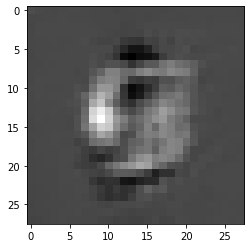

In [19]:
plt.imshow(tf.reshape(model_generator(np.random.randn(1,100)),(28,28)),cmap="gray")

NameError: name 'model' is not defined